**EDA**

In [12]:
import pandas as pd 
import missingno as msn

In [184]:
cab_data = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer_id = pd.read_csv("Customer_ID.csv")
transactions_id = pd.read_csv("transaction_id.csv")

In [34]:
cab_data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [35]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [36]:
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [37]:
transactions_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

**Relations  tables** <br> 
cab_data <- (Transactions, key: Transaction ID) <br>
cab_data <- (city, key: City) <br>
transactions <- (customer_id, key: Customer ID)
           

**Feature Transformations**

**cab date**

In [65]:
cab_data["date"]=pd.to_datetime(pd.to_numeric(cab_data["Date of Travel"],errors='coerce'),errors='coerce',origin='1899-12-30',unit='D')
cab_data.drop("Date of Travel", axis=1, inplace=True)

In [85]:
cab_data.head()

Transaction ID   Company        City  KM Travelled  Price Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost of Trip       date  
0       313.635 2016-01-08  
1       334.854 2016-01-06  
2        97.632 2016-01-02  
3       351.602 2016-01-07  
4        97.776 2016-01-03

**City population**

In [ ]:
city["Population"] = city["Population"].str.replace(",","")
city["Population"] = city["Population"].astype(int)

In [82]:
city["Users"] = city["Users"].str.replace(",","")
city["Users"] = city["Users"].astype(int)

In [83]:
city.head()

City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247

**Transactions**

In [98]:
transactions_id["Payment_Mode"] = pd.get_dummies(transactions_id["Payment_Mode"], drop_first = True)

In [100]:
transactions_id.head()

Transaction ID  Customer ID  Payment_Mode
0        10000011        29290             0
1        10000012        27703             0
2        10000013        28712             1
3        10000014        28020             1
4        10000015        27182             0

**Describe**

In [108]:
cab_data.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000

In [112]:
customer_id.describe()

Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

In [115]:
transactions_id.describe()

Transaction ID    Customer ID   Payment_Mode
count    4.400980e+05  440098.000000  440098.000000
mean     1.022006e+07   23619.513120       0.400154
std      1.270455e+05   21195.549816       0.489930
min      1.000001e+07       1.000000       0.000000
25%      1.011004e+07    3530.000000       0.000000
50%      1.022006e+07   15168.000000       0.000000
75%      1.033008e+07   43884.000000       1.000000
max      1.044011e+07   60000.000000       1.000000

**Master data**

In [126]:
Master_data = cab_data.merge(city, on="City", how="left")
Master_data = Master_data.merge(transactions_id, on="Transaction ID", how="left")
Master_data = Master_data.merge(customer_id, on="Customer ID", how="left")

In [128]:
Master_data.head()

Transaction ID   Company        City  KM Travelled  Price Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost of Trip       date  Population  Users  Customer ID  Payment_Mode  \
0       313.635 2016-01-08      814885  24701        29290             0   
1       334.854 2016-01-06      814885  24701        27703             0   
2        97.632 2016-01-02      814885  24701        28712             1   
3       351.602 2016-01-07      814885  24701        28020             1   
4        97.776 2016-01-03      814885  24701        27182             0   

  Gender  Age  Income (USD/Month)  
0   Male   28               10813  
1   Male   27                9237  
2   Male   53               11242  
3   Male   23               23327  
4   Male   33                8536

**Transformations Master data**

In [130]:
Master_data["prop_user"] = Master_data["Users"] / Master_data["Population"]
Master_data.drop(["Population", "Users"], axis=1, inplace=True)

In [131]:
Master_data

Transaction ID     Company           City  KM Travelled  \
0             10000011    Pink Cab     ATLANTA GA         30.45   
1             10000012    Pink Cab     ATLANTA GA         28.62   
2             10000013    Pink Cab     ATLANTA GA          9.04   
3             10000014    Pink Cab     ATLANTA GA         33.17   
4             10000015    Pink Cab     ATLANTA GA          8.73   
...                ...         ...            ...           ...   
359387        10440101  Yellow Cab  WASHINGTON DC          4.80   
359388        10440104  Yellow Cab  WASHINGTON DC          8.40   
359389        10440105  Yellow Cab  WASHINGTON DC         27.75   
359390        10440106  Yellow Cab  WASHINGTON DC          8.80   
359391        10440107  Yellow Cab  WASHINGTON DC         12.76   

        Price Charged  Cost of Trip       date  Customer ID  Payment_Mode  \
0              370.95      313.6350 2016-01-08        29290             0   
1              358.52      334.8540 2016-01-06        27703             0   
2              125.20       97.6320 2016-01-02        28712             1   
3              377.40      351.6020 2016-01-07        28020             1   
4              114.62       97.7760 2016-01-03        27182             0   
...               ...           ...        ...          ...           ...   
359387          69.24       63.3600 2018-01-08        52392             1   
359388         113.75      106.8480 2018-01-04        53286             1   
359389         437.07      349.6500 2018-01-05        52265             1   
359390         146.19      114.0480 2018-01-05        52175             0   
359391         191.58      177.6192 2018-01-02        52917             0   

       Gender  Age  Income (USD/Month)  prop_user  
0        Male   28               10813   0.030312  
1        Male   27                9237   0.030312  
2        Male   53               11242   0.030312  
3        Male   23               23327   0.030312  
4        Male   33                8536   0.030312  
...       ...  ...                 ...        ...  
359387   Male   24               15651   0.303207  
359388   Male   32                6528   0.303207  
359389   Male   56                7966   0.303207  
359390   Male   32                6423   0.303207  
359391   Male   20               11284   0.303207  

[359392 rows x 13 columns]

**Investigation and Hypothesis**

**Revenue**

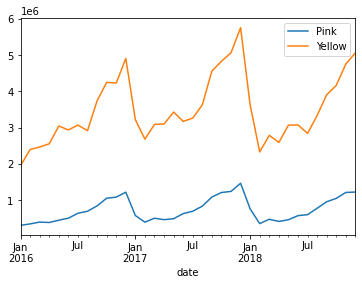

In [158]:
Master_data[Master_data.Company == "Pink Cab"].resample("M", on="date")["Price Charged"].sum().plot(legend=True, label="Pink");
Master_data[Master_data.Company == "Yellow Cab"].resample("M", on="date")["Price Charged"].sum().plot(legend=True, label="Yellow");

**Count Users**

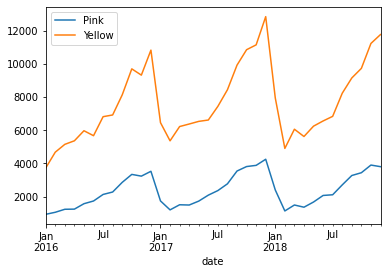

In [157]:
Master_data[Master_data.Company == "Pink Cab"].resample("M", on="date")["Customer ID"].count().plot(legend=True, label="Pink");
Master_data[Master_data.Company == "Yellow Cab"].resample("M", on="date")["Customer ID"].count().plot(legend=True, label="Yellow");

**Seasonality**

In [137]:
Master_data.resample("D", on="date")["Transaction ID"].count().plot();

In [138]:
Master_data.resample("M", on="date")["Transaction ID"].count().plot();

In [160]:
Master_data.groupby("Gender")["Age"].count()

Gender
Female    153480
Male      205912
Name: Age, dtype: int64

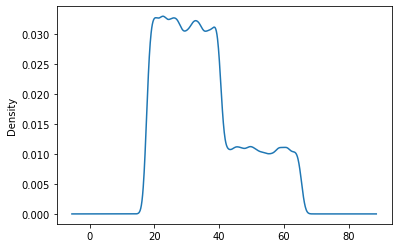

In [166]:
Master_data.Age.plot(kind="kde");

**Hypothesis**

In [175]:
Master_data.groupby("City")["prop_user"].first().sort_values(ascending = False) * 100

City
BOSTON MA         32.141078
WASHINGTON DC     30.320705
LOS ANGELES CA     9.036279
CHICAGO IL         8.412126
SAN DIEGO CA       7.296413
SEATTLE WA         3.733847
NEW YORK NY        3.594514
ATLANTA GA         3.031225
NASHVILLE TN       2.832913
DALLAS TX          2.349858
SILICON VALLEY     2.313756
AUSTIN TX          2.144705
DENVER CO          1.646839
MIAMI FL           1.319862
SACRAMENTO CA      1.290639
ORANGE COUNTY      1.261327
TUCSON AZ          0.904596
PITTSBURGH PA      0.672035
PHOENIX AZ         0.649683
Name: prop_user, dtype: float64

 Boston and Washington are the cities with more proportion of users. 

In [180]:
Master_data.groupby("City")["KM Travelled"].mean().sort_values(ascending = False)

City
SACRAMENTO CA     22.755049
SILICON VALLEY    22.738933
NASHVILLE TN      22.699249
LOS ANGELES CA    22.666410
CHICAGO IL        22.634956
PITTSBURGH PA     22.624341
SEATTLE WA        22.621482
WASHINGTON DC     22.613294
BOSTON MA         22.578074
MIAMI FL          22.531480
NEW YORK NY       22.513988
DALLAS TX         22.485685
SAN DIEGO CA      22.476752
DENVER CO         22.449608
TUCSON AZ         22.387266
ATLANTA GA        22.316231
ORANGE COUNTY     22.307054
AUSTIN TX         22.305413
PHOENIX AZ        22.202074
Name: KM Travelled, dtype: float64

In [181]:
Master_data

Transaction ID     Company           City  KM Travelled  \
0             10000011    Pink Cab     ATLANTA GA         30.45   
1             10000012    Pink Cab     ATLANTA GA         28.62   
2             10000013    Pink Cab     ATLANTA GA          9.04   
3             10000014    Pink Cab     ATLANTA GA         33.17   
4             10000015    Pink Cab     ATLANTA GA          8.73   
...                ...         ...            ...           ...   
359387        10440101  Yellow Cab  WASHINGTON DC          4.80   
359388        10440104  Yellow Cab  WASHINGTON DC          8.40   
359389        10440105  Yellow Cab  WASHINGTON DC         27.75   
359390        10440106  Yellow Cab  WASHINGTON DC          8.80   
359391        10440107  Yellow Cab  WASHINGTON DC         12.76   

        Price Charged  Cost of Trip       date  Customer ID  Payment_Mode  \
0              370.95      313.6350 2016-01-08        29290             0   
1              358.52      334.8540 2016-01-06        27703             0   
2              125.20       97.6320 2016-01-02        28712             1   
3              377.40      351.6020 2016-01-07        28020             1   
4              114.62       97.7760 2016-01-03        27182             0   
...               ...           ...        ...          ...           ...   
359387          69.24       63.3600 2018-01-08        52392             1   
359388         113.75      106.8480 2018-01-04        53286             1   
359389         437.07      349.6500 2018-01-05        52265             1   
359390         146.19      114.0480 2018-01-05        52175             0   
359391         191.58      177.6192 2018-01-02        52917             0   

       Gender  Age  Income (USD/Month)  prop_user  
0        Male   28               10813   0.030312  
1        Male   27                9237   0.030312  
2        Male   53               11242   0.030312  
3        Male   23               23327   0.030312  
4        Male   33                8536   0.030312  
...       ...  ...                 ...        ...  
359387   Male   24               15651   0.303207  
359388   Male   32                6528   0.303207  
359389   Male   56                7966   0.303207  
359390   Male   32                6423   0.303207  
359391   Male   20               11284   0.303207  

[359392 rows x 13 columns]

In average a trip in a cab consists in 22 km without matter the city 

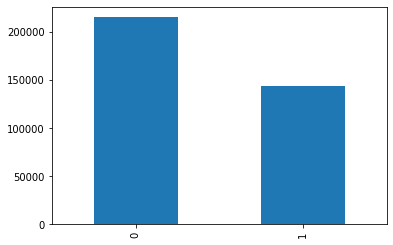

In [183]:
Master_data["Payment_Mode"].value_counts().plot(kind="bar");

There is a slight preference for pay with Credit card

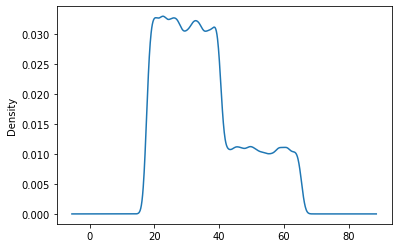

In [186]:
Master_data.Age.plot(kind="kde");

The average customer has 20-40 years

In [189]:
Master_data[Master_data.Company == "Pink Cab"]["Income (USD/Month)"].plot(kind="kde", legend=True, label="Pink");
Master_data[Master_data.Company == "Yellow Cab"]["Income (USD/Month)"].plot(kind="kde", legend=True, label="Yellow")

<AxesSubplot:ylabel='Density'>

There's no preference for one or another company for customers accoridng to his income